<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/som_library_jumbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic uses of SOMPY library
http://www.vahidmoosavi.com


https://github.com/sevamoo/sompy

In [1]:
!git clone https://github.com/hhl60492/SOMPY_robust_clustering.git
%cd SOMPY_robust_clustering
! python setup.py install

fatal: destination path 'SOMPY_robust_clustering' already exists and is not an empty directory.
/content/SOMPY_robust_clustering
running install
running bdist_egg
running egg_info
writing SOMPY.egg-info/PKG-INFO
writing dependency_links to SOMPY.egg-info/dependency_links.txt
writing requirements to SOMPY.egg-info/requires.txt
writing top-level names to SOMPY.egg-info/top_level.txt
adding license file 'LICENSE' (matched pattern 'LICEN[CS]E*')
writing manifest file 'SOMPY.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/sompy
copying build/lib/sompy/sompy.py -> build/bdist.linux-x86_64/egg/sompy
copying build/lib/sompy/neighborhood.py -> build/bdist.linux-x86_64/egg/sompy
creating build/bdist.linux-x86_64/egg/sompy/visualization
copying build/lib/sompy/visualization/umatrix.py -> build/bdist.linux-x86_64/egg/sompy/visualization
copying build/lib/so

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
# import sompy as sompy
import pandas as pd
import numpy as np
from time import time
import sompy

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
%cd ..
df = pd.read_csv("vTestData102.csv")
df = df.drop('CustomID', axis=1)

/content


In [4]:
data = df.to_numpy()

In [5]:
print(data)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


In [6]:
mapsize = [12,12]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='debug')  # verbose='debug' will print more, and verbose=None wont print anything

 Training...
--------------------------------------------------------------
 details: 
      > data len is 195 and data dimension is 15
      > map size is 12,12
      > array size in log10 scale is 5.624488362513449
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.027000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 23

 find_bmu took: 0.109000 seconds
 update_codebook_voronoi took: 0.014000 seconds
 epoch: 1 ---> elapsed time:  0.127000, quantization error: 0.818087

 find_bmu took: 0.107000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 2 ---> elapsed time:  0.120000, quantization error: 0.208197

 find_bmu took: 0.106000 seconds
 update_codebook_voronoi took: 0.004000 seconds
 epoch: 3 ---> elapsed time:  0.116000, quantization error: 0.148260

 find_bmu took: 0.106000 seconds
 update_codebook_voronoi took: 0.003000 seconds
 epoch: 4 ---> e

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
findfont: score(<Font 'STIXGeneral' (S

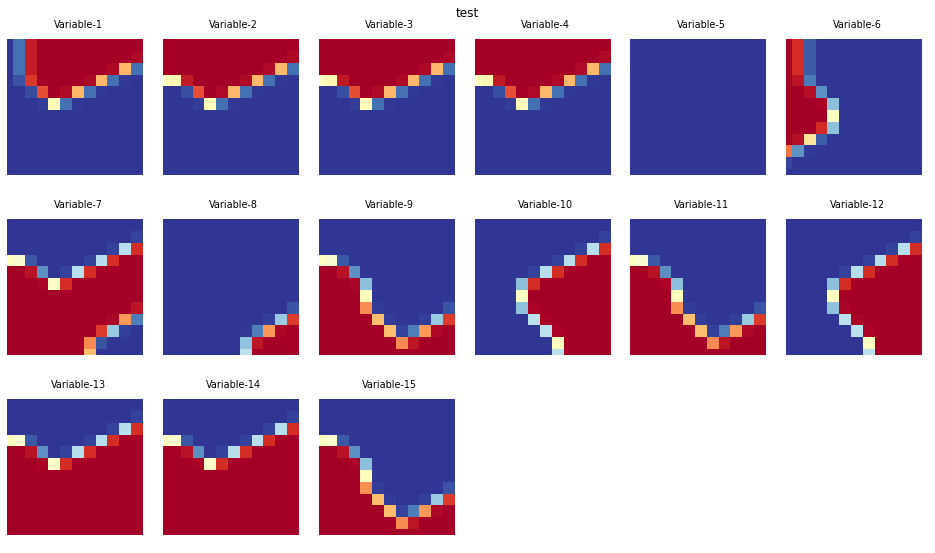

In [7]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim='all', cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

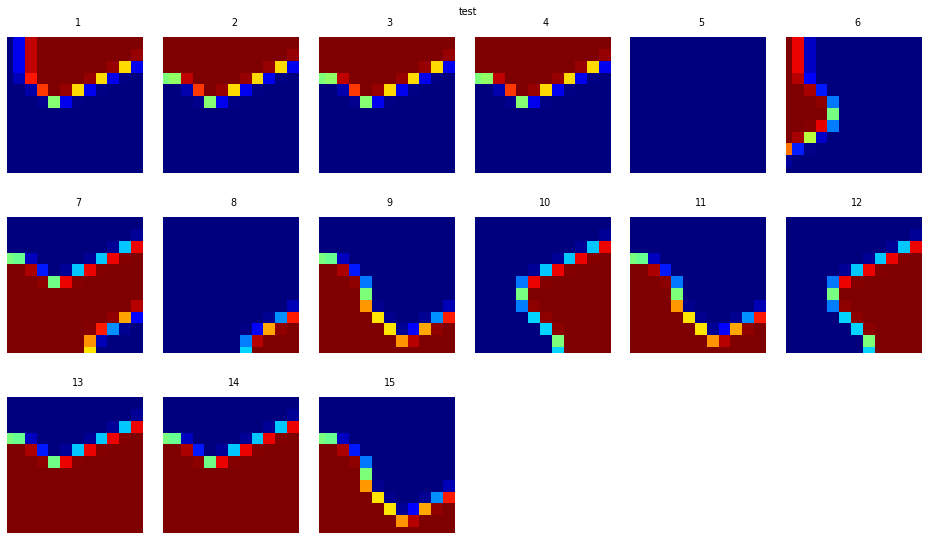

In [9]:
som.component_names = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

In [10]:
# c = sompy.mapview.View2DPacked()
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

Performing K-means SSE elbow sweep...
Working on bootstrap sample 0 K: 2
Working on bootstrap sample 1 K: 2
Working on bootstrap sample 2 K: 2
Working on bootstrap sample 3 K: 2
Working on bootstrap sample 4 K: 2
Working on bootstrap sample 5 K: 2
Working on bootstrap sample 6 K: 2
Working on bootstrap sample 7 K: 2
Working on bootstrap sample 8 K: 2
Working on bootstrap sample 9 K: 2
Working on bootstrap sample 10 K: 2
Working on bootstrap sample 11 K: 2
Working on bootstrap sample 12 K: 2
Working on bootstrap sample 13 K: 2
Working on bootstrap sample 14 K: 2
Working on bootstrap sample 15 K: 2
Working on bootstrap sample 16 K: 2
Working on bootstrap sample 17 K: 2
Working on bootstrap sample 18 K: 2
Working on bootstrap sample 19 K: 2
Working on bootstrap sample 0 K: 3
Working on bootstrap sample 1 K: 3
Working on bootstrap sample 2 K: 3
Working on bootstrap sample 3 K: 3
Working on bootstrap sample 4 K: 3
Working on bootstrap sample 5 K: 3
Working on bootstrap sample 6 K: 3
Working

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

/content/SOMPY_robust_clustering/sompy/visualization/mapview.py:159: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(1, 1, 1)


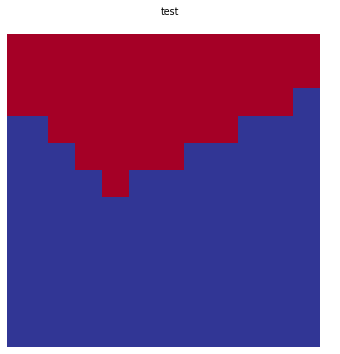

In [11]:
v.show(som, what='cluster')

/content/SOMPY_robust_clustering/sompy/visualization/hitmap.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 1

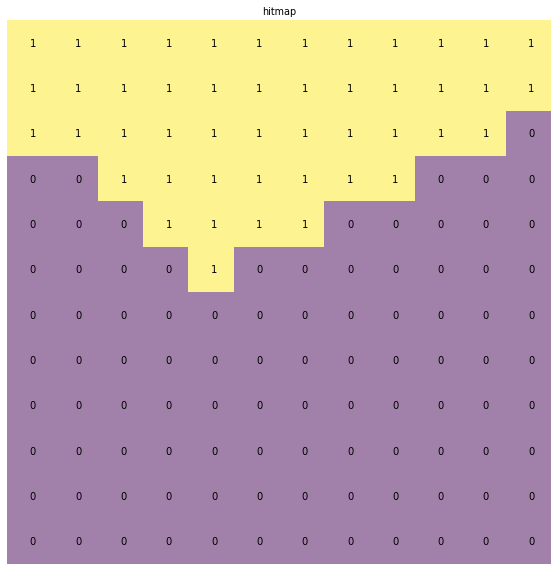

array([[  0,   0,   0],
       [  0,   1,   1],
       [  0,   2,   2],
       [  0,   3,   3],
       [  0,   4,   4],
       [  0,   5,   5],
       [  0,   6,   6],
       [  0,   7,   7],
       [  0,   8,   8],
       [  0,   9,   9],
       [  0,  10,  10],
       [  0,  11,  11],
       [  1,   0,  12],
       [  1,   1,  13],
       [  1,   2,  14],
       [  1,   3,  15],
       [  1,   4,  16],
       [  1,   5,  17],
       [  1,   6,  18],
       [  1,   7,  19],
       [  1,   8,  20],
       [  1,   9,  21],
       [  1,  10,  22],
       [  1,  11,  23],
       [  2,   0,  24],
       [  2,   1,  25],
       [  2,   2,  26],
       [  2,   3,  27],
       [  2,   4,  28],
       [  2,   5,  29],
       [  2,   6,  30],
       [  2,   7,  31],
       [  2,   8,  32],
       [  2,   9,  33],
       [  2,  10,  34],
       [  2,  11,  35],
       [  3,   0,  36],
       [  3,   1,  37],
       [  3,   2,  38],
       [  3,   3,  39],
       [  3,   4,  40],
       [  3,   5

In [12]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

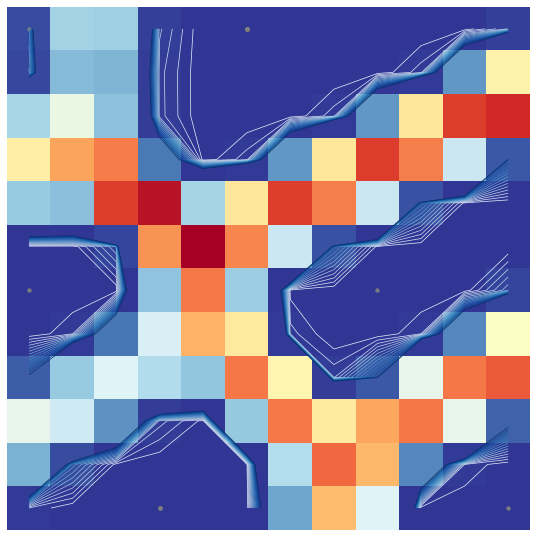

In [13]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)